In [1]:
import course.images

# Vad är en avbildning?
En avbildning i tekniska sammanhang är vad man i andra sammanhang kanske skulle kallat en bild. En avbildning utgår ifrån ett motiv, en *referent*, och försöker återskapa denna i ett annat medium. En målning av en vas är alltså en avbildning på duk av referenten vas. Likaledes är ett fotografi en digital avbildning av någon fysisk referent. En digitalisering, såsom OCR eller inskanning av dokument är på samma sätt avbildningar. Ett annat exempel är mikroskopi, som avbildar mycket små motiv genom optik.

På engelska kallas handlingen att avbilda vanligtvis *imaging*.

## Vad är en bild?
Inom humanistiska och kulturvetenskapliga discipliner är detta en fråga som tvivelsutan skulle leda till kontrovers och diskussion. En bild kan syfta på ett fotografi, en tavla, en ritning, en mental bild och så vidare. Inom bildanalys finns det dock ingen tveksamhet: *En bild är en digital avbildning i två dimensioner*. På engelska används vanligen ordet *image* med samma betydelse. Detta omfattar alla avbildningar som i slutändan är digitala - fotografier, animering, elektronmikroskopi med flera.

Det kan tyckas restriktivt att begränsa betydelsen av bild, men orsaken är utilitaristisk - digitala bilder i 2D kan representeras och manipuleras med mycket specialiserade och effektiva digitala metoder.

## När datorn skall se...
Liksom när datorn skulle läsa är det viktigt att inse att datorer inte *ser*. De kan inte urskilja motiv i en bild, och om de kan göra det har motiven i sig ingen mening. De saknar den kontext och tolkningsförmåga människor har utvecklat. För en dator är en bild endast är en samling *pixlar*, små kvadratiska regioner med en viss färg. Detta gäller oavsett motiv eller avbildningsmetod. 

### Pixlar och färgrymder
Som påpekat i avsnittet om text måste datorer arbeta i siffror. Till skillnad från text så finns det ett par standarder för representationen av bilder numeriskt. En sådan är pixlar med en viss *färgrymd*.

Färgrymder är metoder för att numeriskt representera färg. Det finns flera standarder, och vi kommer endast att behandla vad som kallas RGB (*red*-*green*-*blue*) och gråskala. 

En gråskalepixel är en kvadratisk region som kan anta värden mellan 0 och 255. 0 betecknar vitt, och 255 betecknar svart. Ett värde på 100 ger en ljusgrå pixel, och 200 ger en mörkgrå pixel. Detta betyder att vi kan endast färglägga pixeln med 256 nyanser av grått. Detta kallas att färgen är "kvantiserad". 
<div>
<img src="media/mona_gray.png" width="500"/>
</div>

Det betyder att vi kan representera åtminstone en skala från svart till vitt med siffror. I likhet med fallet med vektormodeller i text kan pixlar kan ha en viss *dimensionalitet*. En gråskalebild har endast en dimension och kan endast representera en skala, och för att fånga fler nyanser i en bild måste vi utöka hur dimensionaliteten hos pixlarna. I RGB består varje pixel av tre överlagrade färger, en *vektor* av värden 0-255. En helt röd pixel har värdet (255, 0, 0), en grön (0, 255, 0) och en blå pixel har värdet (0, 0, 255). 

<div>
<img src="media/mona_colour.png" width="400"/>
</div>

Detta känner många redan till. Det är emellertid viktigt att förstå att en sådan representation av färger är nödvändig för att maskiner skall kunna bearbeta bilderna.

Enbart pixlar gör emellertid inte en bild. Vi måste arrangera dessa på ett lämpligtvis. Nedan är en längd med pixlar föreställande just Mona Lisa. 

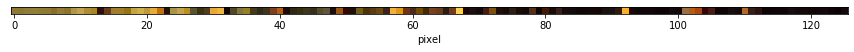

In [2]:
f, axes = course.images.mona_lisa_as_line(n=3)

För en dator är det entydigt en bild av Mona Lisa. Vi å andra sidan kan bara identifiera bilden efter att den arrangerats i ett rutnät. Den högraste bilden motsvarar alltså samma visualisering som ovan.

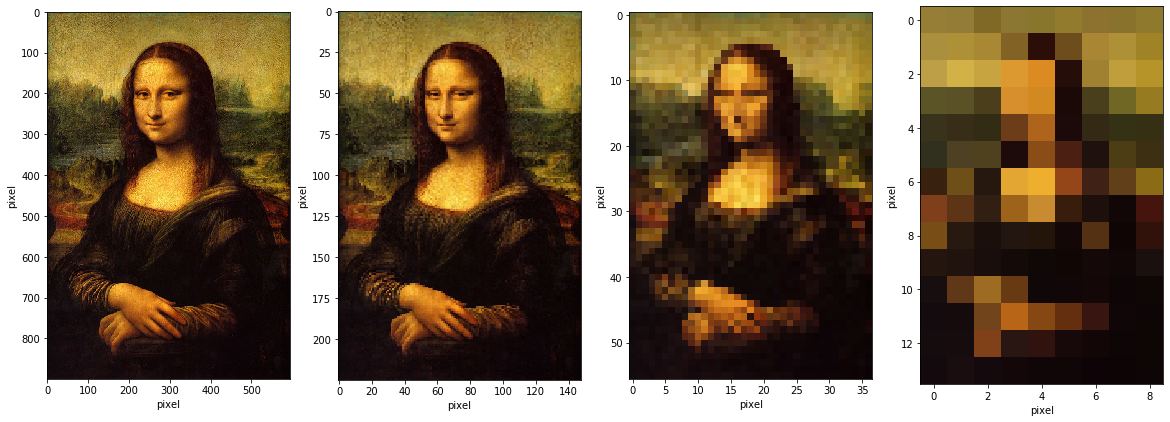

In [3]:
f, axes = course.images.mona_lisa_downscaled(n=4)

Observera att det är skillnad på *fysiska* och *virtuella* pixlar. I den sista bilden består Mona Lisa av endast 8 x 13 virtuella pixlar. Däremot består varje enskild virtuell pixel av de fysiska pixlar ni ser på er datorskärm. Antalet varierar som bekant från monitor till monitor, och är det som syftas på om er skärm är "1080p", "4k" eller "HD". Om er representation i virtuella pixlar är mer högupplöst än ni har fysiska pixlar på er skärm är alltså de fysiska pixlarna gränsen.

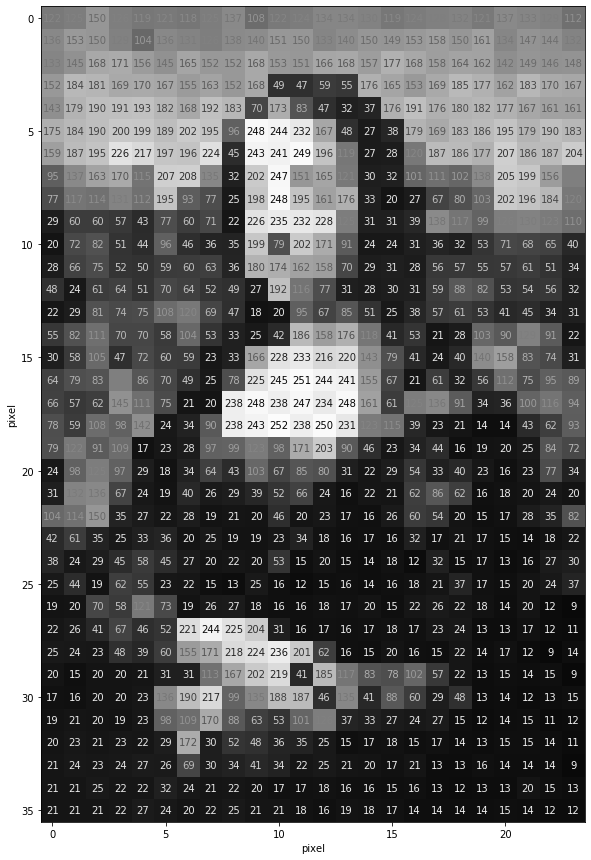

In [4]:
f, axes = course.images.mona_lisa_downscaled_w_annotation(scale=0.04, figsize=(15,15))

# Skalrymden och filtrering
Skalrymd (eng. *scale space*) symboliserar de olika skalor på vilken motiv i en bild existerar. Detta är ett abstrakt koncept de flesta är bekanta med i vardagen, om de någonsin använt Instagram eller liknande. När vi applicerar ett *smoothing*-filter eller liknande på en selfie, är vi intresserade av att ta bort defekter/brus på en liten skala - det rör sig om prickar, pigmentfläckar, acne eller liknande. Vad vi *inte* är intresserade av är att mjuka upp är stora egenskaper i bilden, som näsan, ögonen, munnen. 

Fläckar och ögon/näsa/mun existerar i olika skala i en selfie. En ännu större skala är själva huvudet eller bakgrunden. Uppmjukningsfilter finns alltså i olika storlek, ofta räknat i ungefär vilken pixelstorlek de mjukar upp, jämför nedan. I denna bild försvinner små detaljer i bilden som grässtrån redan vid 4 pixlar, vilket är ungefär den storlek de har i bilden. På samma sätt är endast stora konturer bevarade vid 50 pixels filtrering - bakgrundens hus är ungefär 25 pixlar stora och försvinner därför.

Det är ofta relevant att ha olika stora filter för att kunna ta bort brus eller detaljer på olika nivåer.

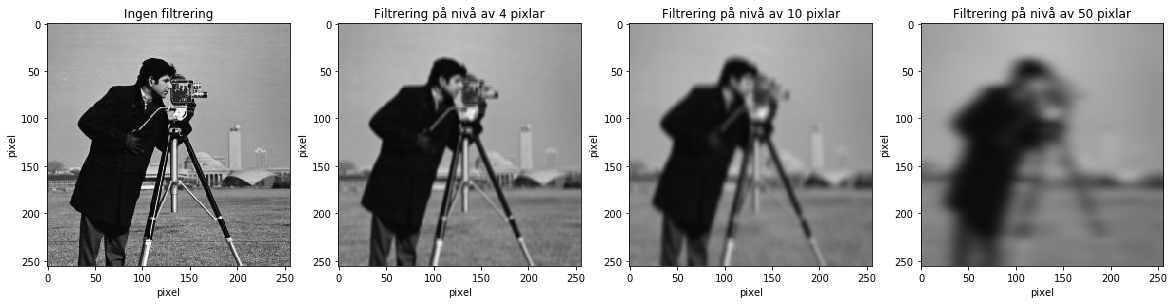

In [2]:
f, axes = course.images.cameraman_scale_space()

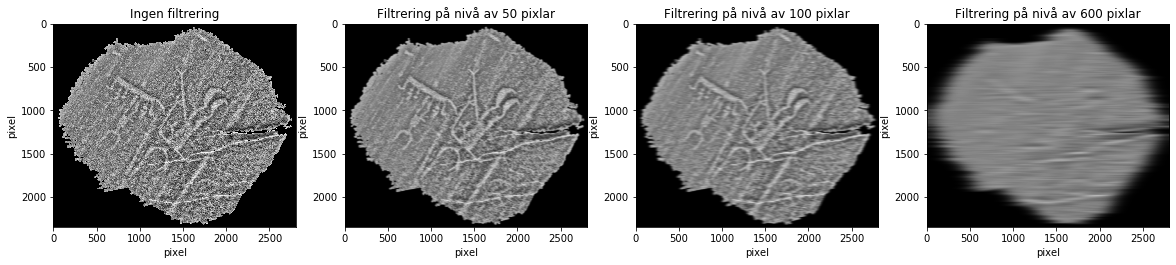

In [7]:
f, axes = course.images.figure_scale_space("media/carving.png", ks=[1, 51, 101, 601])

Skalrymden kan hjälpa oss att isolera detaljer på olika nivå i bilder. Ett enkelt system för att bevara endast små strukturer i hällen (som exempelvis hällristningen, men också skador och brus) är att använda en kraftig filtrering och sedan subtrahera denna som bakgrund! Resultatet blir då som nedan.

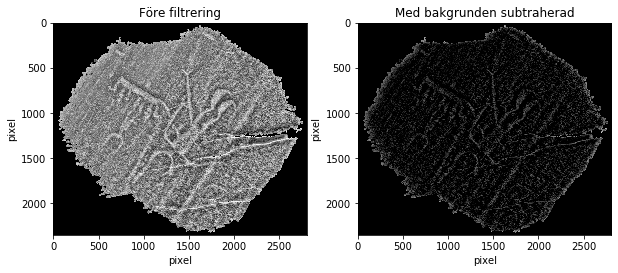

In [3]:
f, axes = course.images.remove_background("media/carving.png", level=501)

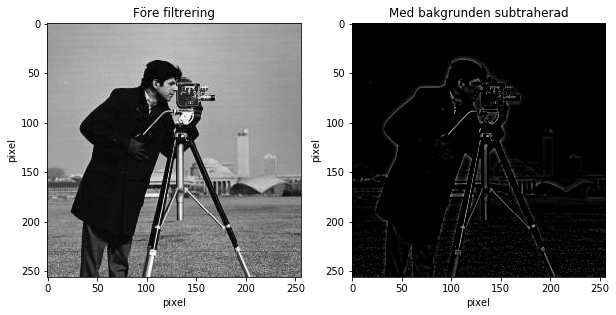

In [4]:
f, axes = course.images.remove_background("media/cameraman.jpg", level=11)

Det är helt och hållet bildernas numeriska representation som tillåter denna typ av enkel behandling. Eftersom pixlar med lika färg har lika värden, kan vi subtrahera dem, och således pixelvis modifiera bilden.

## Brus! Eller, "vad är en bild, part 2"
I alla databehandlingssammanhang förekommer ordet *brus*, dock ofta helt odefinierat. Inom bildanalys förekommer en uppsjö viktiga typer av brus som är informativa för hur bilden producerats och behandlats. Ett försökt till en omatematisk definition av brus vore:

- *brus*: oavsiktliga eller oönskade detaljer 

Brus är alltså högst subjektivt, och utgår för att man som forskare har en modell för sin data, exempelvis sin bild. Denna modell behöver inte vara formaliserad, utan bara underförstådd.

Den vanligaste typen av brus i vardagligt tal är en form av "grynighet" i bilderna. Vi ska försöka nyansera denna bild litet grand.

### Hur skapas en bild?
Låt oss avgränsa oss till fotografier. Ett fotografi skapas genom en kamera som fångar upp och avbildar reflektioner av ljus från ett motiv. Detta ljus kan för enkelhetens skull betraktas som små partiklar, fotoner. För att en bild skall kunna skapas måste tillräckligt ljus fångas in i kameran.

#### Vitt brus
Fotonpartiklarna rör sig emellertid inte helt deterministiskt i "strålar" från ditt motiv. Väl inne i kameran studsar de omkring och reflekteras mot kamerans komponenter. Detta medför att en fotografisk avbildning bli imperfekt. Vidare påverkas fotoner av elektromagnetiska fält, något som en viktig del hos komponenterna i kameran. I kretsar och ledare genereras vad som kallas *termiskt brus* (Johnson-Nyquist-brus) på grund av elektroners rörelse i sladdar och ledningar.

Summan av detta brus är av en händelse normalfördelad (detta är inte uppenbart), och kallas vanligen för *vitt brus*. Detta är vanligen oreducerbart och en konsekvens av dina fotoförhållanden och kamerans uppbyggnad. 

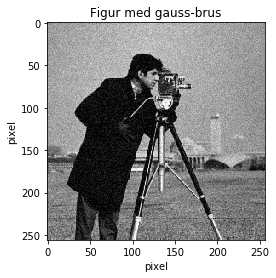

In [4]:
f, ax = course.images.cameraman_w_noise('gauss')

#### Salt-och-peppar 
En annan, mycket vanligt typ av brus kallas vanligen för salt-och-pepparbrus. I en gråskalebild yttrar sig denna vanligen som helvita eller helsvarta pixlar utspridda slumpvis. Detta brus skapas som en konsekvens av konvertering mellan analog till digital representation av bilden (det vill säga från fysisk till maskinrepresentation). I vissa rymdbilder uppkommer liknande mönster av strålning från solen, som består av mycket energirika fotoner.

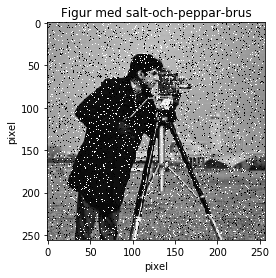

In [2]:
f, ax = course.images.cameraman_w_noise('salt-och-peppar')

#### Kvantiseringsbrus
Kvantiseringsbrus är fenomenologiskt relaterat till salt-och-peppar-brus och uppkommer när man går från en högre upplösning till en lägre. Följden blir att avbildningen blir mindre precis, och något sönderstyckad. Jämför om ni var tvungna att representera Mona Lisa med 600 x 900 pixlar eller 8 x 13 pixlar. Det är viktigt att ha i åtanke att en nedskalning av detta slag sällan är reversibel - i de fall bilder måste skalas ner, är det alltid lämpligt spara originalbilden av denna anledning.


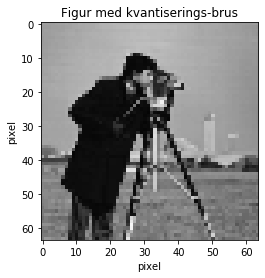

In [2]:
f, ax = course.images.cameraman_w_noise('kvantiserings')

#### Anisotropiskt brus
Gemensamt för alla tidigare former av brus är att de är *isotropiska*. Isotropiskt brus saknar form eller mönster och drabbar således alla delar av en bild lika. En relativt ovanlig men viktig typ av brus är den som har form! Exempelvis kan det röra sig om periodiska mönster i en bild. Om vi studerar bilden på kameramannen kan vi se en tendens till vågräta ränder i bilden. Detta uppkommer på grund av bilden inte togs omedelbart, utan rullade kameran "rullade" över motivet. 

Denna typ av brus kommer inte nödvändigtvis från instrumenten. I hällristningsexemplet kan vi se att det finns en diagonal linjering över hällen - detta är intressant nog en konsekvens glaciärernas tillbakagång över hällarna, vilket skedde i säsong - som årsringar på ett träd!

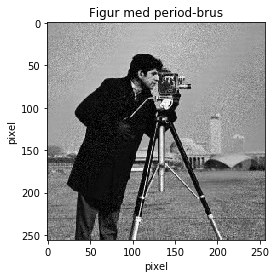

In [2]:
f, ax = course.images.cameraman_w_noise('period')

#### Oönskade detaljer
Vissa detaljer kan klassas som brus även om de inte ser ut som vi föreställer oss dem ovan, en konsekvens av teknologiska tillkorta kommanden eller naturkrafter. Brus kan också vara oönskade motiv - en tumme i kanten på bilden, skador på hällexemplet, eller en spricka i kamerans lins.

## Tillämpningar
Många tillämpningar av bildbehandling och bildanalys glider över i vad som vanligen kallas *maskinlärning*, och viss terminologi gäller alltså även mer generellt för andra data än just bilder. 

<div>
<img src="media/fb_applications.jpg" width="800"/>
</div>
<small>Källa: Facebook Research, https://research.fb.com/blog/2016/08/learning-to-segment/</small>


Det finns tre huvudsakliga grenar av maskinlärningstillämpningar, som ofta kombineras i faktiska applikationer. I lekmannatermer talas det på svenska ofta om *bildigenkänning* vilket är mycket illa definierat och tvetydigt. I grunden har alla tekniker gemensamt att de försöker hitta mönster, motiv och detaljer i bilden, ett problem som är långt ifrån trivialt. Spännvidden, rymden, av alla möjliga bilder är enorm, och det existerar varians både mellan olika motiv, men också mellan likadana motiv.


### Klassifikation

**Prediktion av klasser för en hel bild**

Klassifikation syftar som namnet antyder till att givet datan avgöra vilken kategori eller klass den kommer ifrån. Klasserna är per definition kända på förhand. I bildanalyssammanhang rör det enklaste fallet om att känna igen motiv, det vill säga att det är en bild av en hund, av en människa eller ett landskap. Detta är således vad som kanske skulle kallas kategorisering i arkivsammanhang. Motivet i en bild kan utgöras av en eller flera klasser.

Jämför gärna med *taggarna* i Aroseniusarkivet.
- Exempel på en klass: https://aroseniusarkivet.dh.gu.se/#/image/3207
- Exempel på flera klasser: https://aroseniusarkivet.dh.gu.se/#/image/4788

Dessa exempel är utmärkta exempel på att man enkelt kan lägga till fler klasser till en bild eller motsvarande inskränka antalet. Första bilden skulle exempelvis också kunna vara en "teckning", och den andra endast "målning". Det är därför vanligt att tillämpningar med inskränkning väljer endast några få ömsesidigt uteslutande klasser.

Det är viktigt att förstå att klassifikation inte kräver någon form av lokalisering, utan som minst bara en kategorisering av hela bilden.

### Detektion

**Prediktion av plats i en bild**

Detektion implicerar vanligtvis någon form av lokalisering i bilden, och är ofta vad som avses med *bildigenkänning*. Den vanligaste varianten kallas *object detection* och har för avsikt att lokalisera objekt i en bild, enklast med hjälp av vad som kallas *bounding boxes* som avgränsar objektet. Dessa är en form av *annotation* och måste skapas i förväg som hjälp till algoritmen. I det enklaste fallet är syftet att detektera plats och förekomst av ett på förhand definierat objekt.

Det är väldigt vanligt att detektion kombineras med klassifikation för att både lokalisera och klassificera objekt i bilder. Eftersom båda grenarna kan existera självständigt och i kombination med andra maskinlärningsmetoder är det ändå lämpligt att skilja dem åt.

<div>
<img src="media/kville.png" width="750"/>
</div>

Andra exempel kommer från domänen av självkörande fordon, där kameror används för att i realtid lokalisera omkringliggande objekt, som bilar, trafikskyltar eller fotgängare.

### Segmentering

**Prediktion av klasser för enskilda pixlar**

Slutligen kan man tala om segmentering. Segmentering syftar att tilldela varje enskild pixel en klass. Detta är väsentligt mycket svårare än att använda bounding boxes, då konturer har mycket stor variation. Segmentering baseras kan antingen vara baserad på manuell annotation av alla pixlar i regioner (vilket är mycket arbetssamt), eller ske automatiskt baserat på exempelvis färg, kanter eller intensitet i bilden.

Segmentering delas ibland in i *semantisk segmentering* där syftet är att endast klassificera pixlarna efter någon förutbestämd klass, exempelvis "stol". I *instanssegmentering* är man också intresserad av att särskilja instanser av samma klass, och har därmed mycket gemensamt med objektdetektion.

<div>
<img src="media/segmentation.png" width="750"/>
</div>

Segmentering kan tyckas vara den mest komplicerade bildanalystekniken, men faktum är att man med mycket enkla medel kan åstadkomma mycket lovande resultat. Exempelvis genom att enbart tröskla får vi:

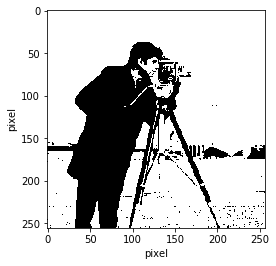

In [3]:
f, ax = course.images.segment_cameraman()

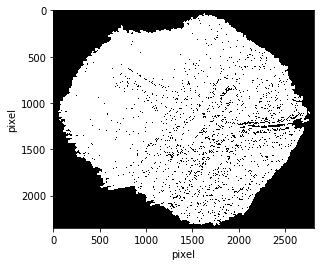

In [2]:
f, ax = course.images.segment_threshold('media/carving.png')